# Zombie Apocalypse

In this course we have studied many interesting and practical numerical solution problems intended to give us a better understanding of some of the typical engineering problems we as engineers could encounter in our career.  For my final project I have chosen a topic that while interesting to model, is hopefully (at least for our sake) never going to be encountered.  This model will require some assumptions be made so it is not intended to be perfect mathematical representation.  With that said lets start a model for the zombie apocalypse.

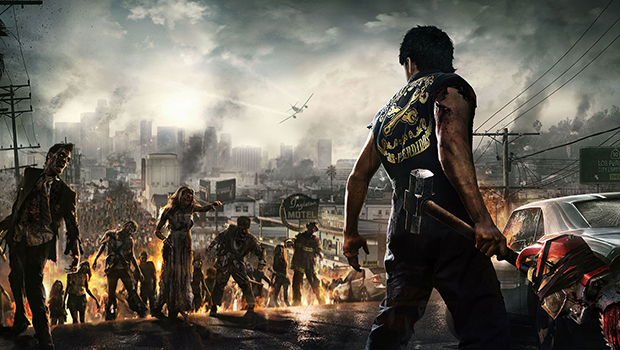

In [1]:
from IPython.display import Image
Image(filename='/Users/jasonliz/Documents/image1.jpg')

## Background

The first step in modeling for this dooms day scenario would be to define what a zombie is for anyone who doesn't already know.  Per Wikipedia, zombies are fictional undead creatures created through the reanimation of human corpses.  Usually in these doomsday scenarios some virus is inadvertently introduced into the general population with an initial patient, commonly referred to as "patient zero" being the first zombie.  Zombies don't require anything like food or water to live however they do have a insatiable appetite for human flesh.  The zombie virus is then spread through the population by bites from infected individuals.  My project will work under the assumption that this outbreak has already occurred however there is a "safe" community inside of a walled city that is keeping all of the infected at bay.

Rick Grimes from AMC's The Walking Dead doesn't appear to be too concerned behind his chain link fence...but should he be?

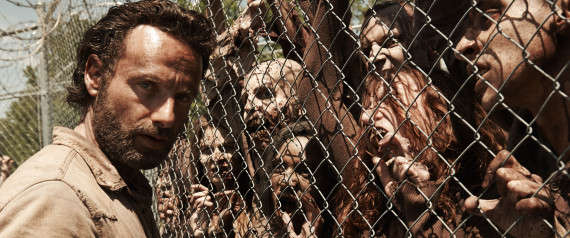

In [2]:
from IPython.display import Image
Image(filename='/Users/jasonliz/Documents/image2.jpg') 

So what's there to model right?  All the undead are outside of the city with only the living inside, what could go wrong?  As fans of the television show "The Walking Dead" know, these "safe" communities never stay safe for long. Usually there is some kind of a breech in the wall that lets the flood of the undead in but one way or another the infected always find their way inside.  For this model lets take a page out of that TV show and assume a mysterious zombie virus has apparently infected everyone in the population. The living keep the virus in check by some unknown means but when someone dies—whether quickly after being bitten by a zombie or by natural causes the result is the same: After death, everyone is reanimated as a bloodthirsty zombie.  In this scenario it doesn't matter how you die, if the brain is still intact that person will become a zombie.

## SZR Model 

A good starting place to find some useful equations would be to look at the classic SIR model.  This model is commonly used to model the effect of a rapid infection on a group of people in contact with one another.  Sounds like as good of a place as any to start doesn't it?  The SIR model works by divided the population into one of three groups.

* S: "Susceptible" - This is the number of current healthy individuals that could potentially become infected.

* I: "Infectious" - This is the number of individuals infected with the virus.

* R: "Recovered" - This is the number of individuals who have recovered from the virus.

In order to predict the effect of the virus over the population over time, a few other variables need to be defined.

* β: "The contact rate" - This is the probability that a susceptible would become infected if the two were to meet.

* γ:  "The rate of recovery" - This is expressed as 1/(duration of infection), i.e., in reciprocal units of time.

The following differential equations are then obtained to express the behavior of the infection over time.

$\dfrac{dS}{dt} = -βIS$ 

$\dfrac{dI}{dt} =  βIS - γI$

$\dfrac{dR}{dt} = γI$

That’s great for modeling something like the flu, but we are talking about zombies here!  Fortunately for us some professors up in Ottawa came up with a modified version of this model to be used for zombies.  The whole paper can be found [here.](https://loe.org/images/content/091023/Zombie%20Publication.pdf)

The SZR model has three compartments, as before, but the infected catagory now is defined as "Z" for zombie.  Additionally, there is no recovering from a zombie bite so the new "R" value now stands for removed.  Finally, the transitions between them are more complex.

* β – the probability that a susceptible becomes a zombie when the two encounter each other.

* α – the rate at which zombies are killed.

* ζ – the rate at which humans in the removed class resurrect to become zombies.
    
* Π - Birth rate
    
* δ - The rate at which the susceptibles die from something other then a zombie bite

This then gives us the following differential equations.

$\dfrac{dS}{dt} = Π − βSZ − δS$ 
    
$\dfrac{dZ}{dt} = βSZ + ζR − αSZ$

$\dfrac{dR}{dt} = δS + αSZ − ζR$
    
Since we are only looking at short period of time for this model, the birth rate can be neglected.  Additionally we don't expect their to be any deaths that wouldn't result in reanimation as even deaths from something other then a zombie bite would still produce a zombie.  Therefore we can assume δ = 0.  

Finally we need to assume a ζ value as the rate at which the zombies come back from the dead.  There is a significant variation on this depending on your source.  It can take a full day, to a few hours or happen in just a few seconds.  For instance in the movie World War Z the infection takes over its host in only 12 seconds!!



We will assume a worst-case scenario in our model so that susceptibles who are bit do not go into the removed group but instead are converted straight to a zombie.  This simplifies the equations giving us the following differential equations to use for our model.

$\dfrac{dS}{dt} = −βSZ$ 

$\dfrac{dZ}{dt} = βSZ − αSZ = (β−α)SZ$

$\dfrac{dR}{dt} = αSZ$

## Reaction-Diffusion 

The above equations look reasonable but do they make sense?  Lets break it down some more.  

Based on the parameters described above, we are assuming only two possible outcomes when a zombie comes in contact with a susceptible.

1. The susceptible kills the zombie by damaging its brain removing that zombie from our model.

2. The zombie bites the susceptible converting him/her to a zombie who is now free to attack and infect other susceptibles.  

These outcomes can easily be written as a chemical reaction similar to what we had seen in the fourth HW assignment.

* S + Z → S       (At rate α)
* S + Z → Z + Z   (At rate β)

According to the Law of Mass Action, the rate of any chemical reaction is proportional to the product of the masses of the reacting substances.  Based on the above image we can verify the above equations are correct and therefore should give us our change in population for each group as a function of time. 

Based on these equations what assumptions can we make?  Well we see that the population of the susceptibles is only going to decrease with time.  This doesn't bode will for the human race does it!  In the initial outbreak we could have introduced a military presence to try and fight off the epidemic but at this point we are assuming the only people alive to fight the zombies are represented in our initial walled city population.  They are just going to have to make due.

What about the zombies?  Well based on the above equation it depends. If beta is larger then alpha the zombie population will only increase with time.  Let's see, a constantly declining susceptible population with a constantly increasing zombie population.  Sounds like our days or maybe even hours are numbered.  Fortunately not all hope is lost, if the alpha value is higher then beta, then the zombie population will also decrease over time.  Both populations will be in decline and it will come down to who is still standing at the end. 

The final piece of the puzzle for this model is to incorporate some type of spacial grid system to track how quickly the infection can spread within our city limits.  We wouldn't expect a zombie to be able to infect a susceptible from a mile away right?  The infection is transmitted through a bite and since we are assuming that no deaths in the city are the result of anything other then a zombie bite we can assume that the only way the infection spreads is if the two groups come in direct contact with one another.

So how do we model the zombie movement within our city?  According to [Munz and others](https://loe.org/images/content/091023/Zombie%20Publication.pdf) “the ‘undead’ move in small, irregular steps.”  As such a good mathematically representation of this would be to use diffusion.

Per [link](http://hyperphysics.phy-astr.gsu.edu/hbase/kinetic/diffus.html), diffusion refers to the process by which molecules intermingle as a result of their kinetic energy of random motion.  Of course once a zombie were to see a susceptible there motion would no longer be random.  They would be attracted to that individual and follow it for as long as they were aware of its existence.  The below youtube clip from "The Walking Dead" illustrates this. 

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('A64m539HpiE')

Modeling this change in movement for each individually zombie would add a great deal of complexity to the model.  For instance how far away can they see? Can they hear them from even farther? etc.  For the sake of my sanity lets just assume that there movement is always going to be random.

Putting that into a 2-D equation:

$\dfrac{dZ}{dt} = Dz(\dfrac{d^2Z}{dx^2}+\dfrac{d^2Z}{dy^2})$


* Dz – The diffusion coefficient of zombies

Likewise the susceptible population will also diffuse within our city.  We will assume like before that there movements are also random.  Like with the zombies, there movement would only be random until they figured out what was going on.  The brave ones may want to approach the zombies in an attempt to remove them while some others may think it would be wiser to run the other direction.  Adding these variables would again add a great deal of complexity to this model so we will once again assume that there movement stays random.  

Putting that into a 2-D equation:

$\dfrac{dS}{dt} = Ds(\dfrac{d^2S}{dx^2}+\dfrac{d^2S}{dy^2})$ 

* Ds – The diffusion coefficient of susceptibles

Combining these diffusion equations with there reaction equations give us the following equations to evaluate:

$\dfrac{dS}{dt} = Ds(\dfrac{d^2S}{dx^2} + \dfrac{d^2S}{dy^2}) − βSZ$

$\dfrac{dZ}{dt} = Dz(\dfrac{d^2Z}{dx^2} + \dfrac{d^2Z}{dy^2}) + (β−α)SZ$

## The Code... 

Now that we have some equations to work with, lets start setting up our model.

### Spatial Grid 

In [4]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline

We first need to pick our walled city to model.  There aren't many of these still around but lets use Old City Jerusalem as our surviving city.  Per [Wikipedia](https://en.wikipedia.org/wiki/Old_City_(Jerusalem), Old City is a 0.35 sq mi walled area within the modern city of Jerusalem.  Additionally as of 2007 the total population was 36,965.  To make things a little easier for us let's assume that the population that remains is evenly distributed in the city at the time of the outbreak.  If we want to get a population around that 2007 number lets create a grid that is 200 x 200 with each intersection representing 1 healthy susceptible.  That should give us a total population of 40,000. (Pretty good for a post-apocalyptic world)

In [5]:
Areaofcity = .35*5280**2          #Area of City in Sq feet
wall_length = Areaofcity**.5      #Length of the wall along the X and Y-axis in feet

n = 200                           #Number of grid points on the X & Y Axis
dh = wall_length/(n-1)            #Spacing of grid points along the X and Y Axis
S = numpy.ones((n,n))             #Initial Susceptible Population
Z = Z = numpy.zeros_like(S)       #Initial Zombie Population

Now lets introduce our "Patient Zero" at some random location inside our city.

In [6]:
Z[76,135]=1                       #Patient Zero Location

Let's do a contour plot to verify our patient zero is inside the city!

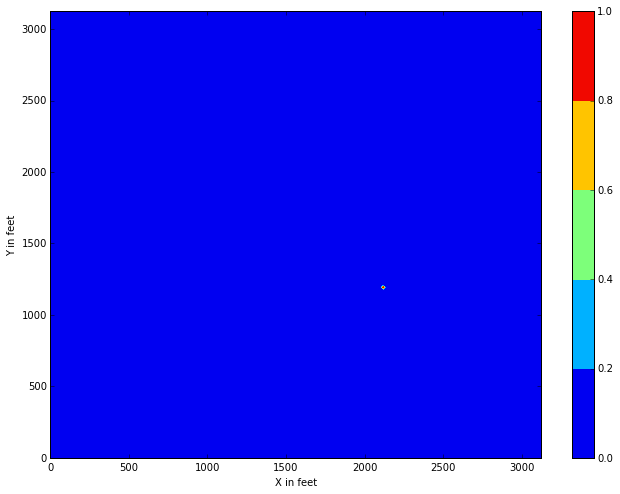

In [7]:
x =numpy.linspace(0,wall_length, n)
y =numpy.linspace(0,wall_length, n)

mx, my = numpy.meshgrid(x,y)

pyplot.figure(figsize=(11,8))
pyplot.contourf(mx,my,Z,5)
pyplot.xlabel('X in feet')
pyplot.ylabel('Y in feet')
pyplot.colorbar();

### Stability 

Since there is calculated diffusion coefficient for Zombies we will have to assume values that make sense.  In some forms of media the zombies can actually be quite fast (World War Z) but usually they are pretty slow.  Lets assume that a zombie can cover 100 sq ft/minute.  Seems resonable enough right?

What about the susceptibles?  Well they wouldn't just wander around without a reason to like the zombies so they should be covering less ground.  Lets make there initial diffusion rate 50 sq ft/minute.

In [8]:
Ds = 50        # Susceptible Diffusion Coefficient in sq ft/hr            
Dz = 100        # Zombie Diffusion Coefficient in sq ft/hr

Since we have the same mesh spacing for our x and y grid, we know from Module 4.3 that our 2D explicit discretization of the diffusion equation will be stable as long as: $$D\dfrac{Δt}{δ^2} < 1/4$$

* δ: mesh spacing (Δx = Δy)
* D: The Max diffusion coefficient used

In [9]:
T = 365*24                           # Final Time Step (1 Year after Infection)
dt = .9 * dh**2 / (4*max(Ds,Dz))     # Time Spacing in hours 
nt = int(T/dt)                       # Number of time steps

### Explicit scheme in 2D

As specified above our 2-D Zombie and Susceptible diffusion-reaction equations are:

$\dfrac{dS}{dt} = Ds(\dfrac{d^2S}{dx^2} + \dfrac{d^2S}{dy^2}) − βSZ$

$\dfrac{dZ}{dt} = Dz(\dfrac{d^2Z}{dx^2} + \dfrac{d^2Z}{dy^2}) + (β−α)SZ$

Let's write both these equations out discretized using forward difference in time, and central difference in space, using an explicit scheme.

$\dfrac{S^{n+1}_{i,j} - S^n_{i,j}}{\Delta t} = Ds \left( \frac{S^n_{i+1, j} - 2S^n_{i,j} + S^n_{i-1,j}}{\Delta x^2} + \frac{S^n_{i, j+1} - 2S^n_{i,j} + S^n_{i,j-1}}{\Delta y^2}\right) - \beta S^n_{i,j} Z^n_{i,j}$

$\dfrac{Z^{n+1}_{i,j} - Z^n_{i,j}}{\Delta t} = Dz \left( \frac{Z^n_{i+1, j} - 2Z^n_{i,j} + Z^n_{i-1,j}}{\Delta x^2} + \frac{Z^n_{i, j+1} - 2Z^n_{i,j} + Z^n_{i,j-1}}{\Delta y^2}\right) - (\alpha - \beta) S^n_{i,j} Z^n_{i,j}$

Now we just have to rearrange the above equations to solve for the value at the next time step.  This yields


$S^{n+1}_{i,j}= S^n_{i,j} + Ds \left( \frac{\Delta t}{\Delta x^2} (S^n_{i+1, j} - 2S^n_{i,j} + S^n_{i-1,j}) + \frac{\Delta t}{\Delta y^2} (S^n_{i, j+1} - 2S^n_{i,j} + S^n_{i,j-1})\right) - ( \beta S^n_{i,j} Z^n_{i,j} ) {\Delta t}$

$Z^{n+1}_{i,j}= Z^n_{i,j} + Dz \left( \frac{\Delta t}{\Delta x^2} (Z^n_{i+1, j} - 2Z^n_{i,j} + Z^n_{i-1,j}) + \frac{\Delta t}{\Delta y^2} (Z^n_{i, j+1} - 2Z^n_{i,j} + Z^n_{i,j-1})\right) - \left( (\alpha - \beta) S^n_{i,j} Z^n_{i,j} \right) {\Delta t}$

Additionally, we need to construct our boundary conditions for this model.  For this model our boundry is the constructed wall that surrounds our city.  This will keep any of the undead outside of our city out but will also keep anything inside our city in.  If a zombie or human were to come up and hit against one of our walls we would expect them to be redirected elsewhere.  We will need to use Neumann boundary conditions for this model.

Lets also include a built in stop to the code so it will tell as when one side has won.

In [10]:
def ftcs(S, Z, nt, dt, dh):
   
    for n in range(nt):
        Sn = S.copy()
        Zn = Z.copy()
        
        S[1:-1,1:-1] = Sn[1:-1,1:-1] + Ds *(dt/dh**2 * (Sn[2:,1:-1] - 2*Sn[1:-1,1:-1] + Sn[:-2,1:-1]) + dt/dh**2 * (Sn[1:-1,2:] - 2*Sn[1:-1,1:-1] + Sn[1:-1,:-2])) - (beta * Sn[1:-1,1:-1] * Zn[1:-1,1:-1] * dt)
        Z[1:-1,1:-1] = Zn[1:-1,1:-1] + Dz *(dt/dh**2 * (Zn[2:,1:-1] - 2*Zn[1:-1,1:-1] + Zn[:-2,1:-1]) + dt/dh**2 * (Zn[1:-1,2:] - 2*Zn[1:-1,1:-1] + Zn[1:-1,:-2])) + ((beta-alpha) * Sn[1:-1,1:-1] * Zn[1:-1,1:-1]) * dt   
        
        # Neumann conditions everywhere
        S[0,:] = S[1,:]
        S[:,0] = S[:,1]
        S[-1,:] = S[-2,:]
        S[:,-1] = S[:,-2]
        Z[0,:] = Z[1,:]
        Z[:,0] = Z[:,1]
        Z[-1,:] = Z[-2,:]
        Z[:,-1] = Z[:,-2]
    
        
        # Check to see if we still have any Susceptibles or Zombies left in our population
        if numpy.all(Sn == 0):
            print("The Zombies have won at time {0:.1f}hrs.".format(dt*n))
            break
        
        if numpy.all(Zn == 0):
            print("Civilization has prevailed at time {0:.1f}hrs.".format(dt*n))
            break
            
    return S, Z

Now we just need to define our two values of beta and alpha.

In [11]:
beta = .70                 # The probability that a susceptible becomes a zombie when the two encounter each other.
alpha = .30                # The rate at which zombies are killed

zombie = ftcs(S, Z, nt, dt, dh)

The Zombies have won at time 1893.8hrs.


Looks like the zombies have eliminated the human population after approximately 79 days.  Lets see what the contour plot looks like now.

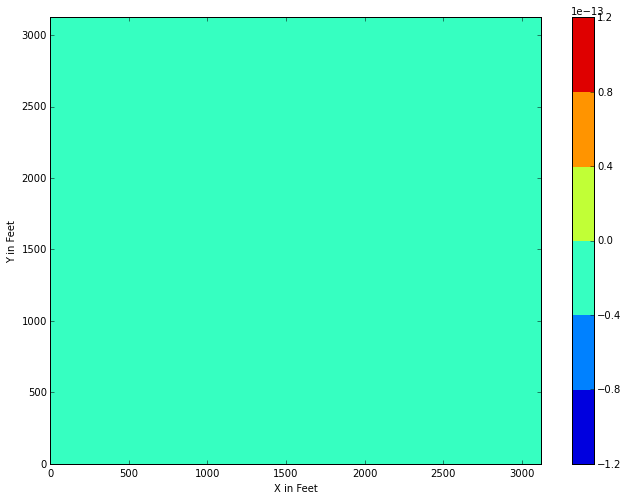

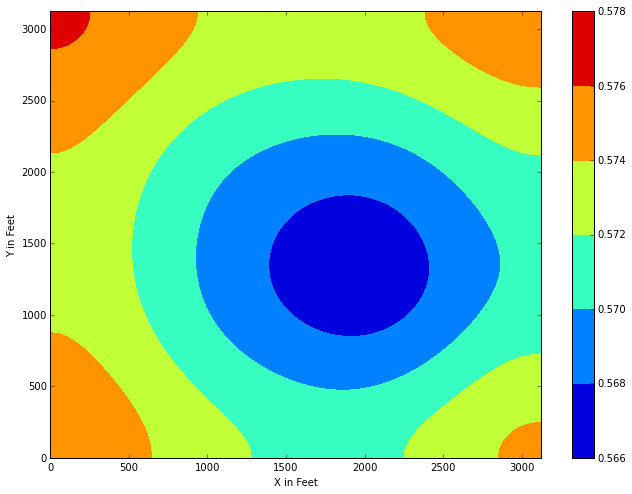

In [12]:
pyplot.figure(figsize=(11,8))
pyplot.contourf(mx,my,S,5)
pyplot.xlabel('X in Feet')
pyplot.ylabel('Y in Feet')
pyplot.colorbar();


pyplot.figure(figsize=(11,8))
pyplot.contourf(mx,my,Z,5)
pyplot.xlabel('X in Feet')
pyplot.ylabel('Y in Feet')
pyplot.colorbar();

The above plots show that the susceptible population has effectively been reduced to zero.  Civilization is lost.

The below clip from the movie "World War Z also shows a scene of Old City Jerusalem trying to prevent the zombies on the outside from getting in.  Looks like they didn't fair much better in the movie.

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('Z1mc8LCe0tc')

A lot of assumptions were made in this model but it is clear that if the zombie outbreak were to ever occur, civilization as we know it would likely never be the same.  Our best chance for survival would likely be to try and set up a safe communitiy in some remote location.  Just make sure no one inside get infected.  Good luck everyone!

##### Dig Deeper

* This model assumes the worst case senario where a bit indiviual would instantly become a zombie.  Modify the existing code so that this wouldn't occur for for 1 min, for 1 hour, or for 1 day and see how this changes result.

* Try experimenting with different alpha and beta values to see how much this effects the results.

### References 

*  Smith?, Robert. [Mathmatical Modeling of Zombies] University of Ottawa Press, 2014. [PDF](https://people.maths.ox.ac.uk/maini/PKM%20publications/384.pdf)

In [14]:
from IPython.core.display import HTML
css_file = '/Users/jasonliz/numerical-mooc/styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())